# Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

## Fundamental Idea of Ensemble Techniques

The main idea behind **ensemble techniques** is to **combine multiple individual models (called base learners)** to create a stronger and more accurate model.  
The intuition is that **a group of weak models working together can outperform a single strong model**, just like a team effort is often better than an individual effort.

In other words, ensemble methods reduce errors by leveraging **diversity among models** and **aggregating their predictions**.

## Bagging (Bootstrap Aggregating)

**Approach:**
- Bagging trains multiple models **in parallel** on different random subsets of the data.
- Each subset is created by **random sampling with replacement** (called bootstrapping).
- The final prediction is made by **averaging (for regression)** or **majority voting (for classification)**.

**Objective:**
- The goal of bagging is to **reduce variance** and prevent **overfitting**.
- Example algorithms:  
  - **Random Forest** (ensemble of decision trees using bagging)

**Workflow:**
1. Create multiple bootstrapped datasets from the original dataset.  
2. Train a separate model (e.g., decision tree) on each dataset.  
3. Combine their predictions through averaging or voting.


## Boosting

**Approach:**
- Boosting trains models **sequentially**, where each new model **focuses on correcting the mistakes** made by previous models.
- It gives **more weight to misclassified samples**, forcing the next model to learn them better.

**Objective:**
- The goal of boosting is to **reduce bias** and improve **model accuracy**.
- Example algorithms:  
  - **AdaBoost (Adaptive Boosting)**  
  - **Gradient Boosting**, **XGBoost**, **LightGBM**

**EWorkflow:**
1. Train a weak model on the full dataset.  
2. Increase weights of misclassified samples.  
3. Train the next model to correct those mistakes.  
4. Combine all weak learners for final prediction.


| Aspect               | **Bagging** | **Boosting** |
|----------------------|-------------|---------------|
| Training Type        | Parallel     | Sequential    |
| Focus                | Reducing variance | Reducing bias |
| Data Sampling        | Bootstrapped subsets | Weighted data based on previous errors |
| Model Dependency     | Independent models | Dependent models (each builds on previous) |
| Common Algorithms    | Random Forest | AdaBoost, Gradient Boosting, XGBoost |
| Strength             | Stability, Less overfitting | High accuracy, Lower bias |
| Weakness             | May not reduce bias | Sensitive to noise & overfitting |

---


# Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

##How Random Forest Reduces Overfitting

A **single Decision Tree** often tends to **overfit** the training data because it tries to perfectly classify all training examples, capturing noise and small variations in the dataset.

A **Random Forest Classifier**, on the other hand, is an **ensemble of multiple decision trees** built on different random subsets of the data and features.  
It combines their predictions (via **majority voting** for classification) to make the final decision.

This randomization and aggregation process helps in **reducing variance** and **improving generalization**, which significantly lowers the chances of overfitting.


### 1. **Random Sampling of Data (Bagging)**
- Each decision tree in the forest is trained on a **different random subset** of the original dataset (with replacement).
- Because every tree sees slightly different data, they learn different decision boundaries.
- When their predictions are averaged (or voted), **random errors cancel out**, reducing overfitting.

### 2. **Random Feature Selection**
- During the construction of each tree, **only a random subset of features** is considered at each split.
- This prevents highly correlated trees from forming and promotes **model diversity**.
- As a result, no single strong feature dominates all trees, making the model more robust.


##Two Key Hyperparameters That Help Reduce Overfitting

| **Hyperparameter** | **Description** | **Effect on Overfitting** |
|--------------------|------------------|----------------------------|
| `n_estimators` | The number of trees in the forest. | More trees generally improve performance and reduce overfitting by averaging out noise, but too many can increase computation time. |
| `max_features` | The number of features to consider when looking for the best split. | Lower values (e.g., `'sqrt'` or `'log2'`) make trees less correlated, increasing model diversity and reducing overfitting. |

- **Random Forest** reduces overfitting by introducing randomness in both:
  - **Data sampling (bagging)**
  - **Feature selection (random subsets per split)**  
- The **ensemble averaging** smooths out the noise that an individual decision tree might capture.
- Proper tuning of `n_estimators` and `max_features` further helps in building a model that is **both accurate and generalizable**.


---
# Question 3: What is Stacking in Ensemble Learning? How does it differ from traditional Bagging/Boosting methods? Provide a simple example use case.

## Stacking:

**Stacking (Stacked Generalization)** is an **ensemble learning technique** that combines multiple different machine learning models (called **base models**) and uses another model (called a **meta-learner** or **blender**) to make the final prediction.

- Instead of taking a simple majority vote (as in bagging) or sequentially improving weak models (as in boosting), stacking **learns how to best combine the predictions** of several base models using a meta-model.

## Working

1. **Train Base Models (Level-0 models):**
   - Train different models (e.g., Decision Tree, SVM, Logistic Regression) on the training data.
   - Each model makes predictions on the validation data.

2. **Generate Meta Features:**
   - The predictions from these base models become **inputs (features)** for the next-level model.

3. **Train Meta-Model (Level-1 model):**
   - A separate model (like Logistic Regression or Random Forest) learns to combine the base model predictions and make the **final output**.


##  Difference Between Bagging, Boosting, and Stacking

| **Aspect** | **Bagging** | **Boosting** | **Stacking** |
|-------------|-------------|---------------|---------------|
| **Goal** | Reduce variance | Reduce bias | Combine strengths of different models |
| **Model Type** | Same model type (e.g., many Decision Trees in Random Forest) | Sequentially improved weak learners | Different model types combined |
| **Training Process** | Independent models trained in parallel | Sequential models where each focuses on previous errors | Models trained independently, then meta-model combines their outputs |
| **Final Prediction** | Majority vote or average | Weighted sum of weak learners | Meta-learner decides best combination |

## Example Use Case

**Use Case:** Predicting whether an email is spam or not.

- **Base Models (Level 0):**
  - Logistic Regression → good at linear patterns  
  - Decision Tree → captures non-linear relationships  
  - Naïve Bayes → works well with text data  

- **Meta Model (Level 1):**
  - Random Forest → learns from the predictions of the above models to make a final decision.

This approach can yield higher accuracy because the meta-model learns **which base model performs best under which conditions**.


- **Stacking** is a powerful ensemble method that combines multiple diverse models using another model as a **meta-learner**.
- It generally provides **better performance** than bagging or boosting when base models are diverse.
- The main difference is that **stacking learns how to combine models intelligently**, instead of averaging or weighting them.


---
# Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

## OOB (Out-of-Bag) Score

The **OOB Score (Out-of-Bag Score)** is an internal validation technique used in **Random Forest** to estimate the model’s performance **without needing a separate validation or test dataset**.

When Random Forest builds multiple decision trees, it uses **bootstrap sampling** — meaning each tree is trained on a random subset of the training data **with replacement**.  
As a result, some samples are **not used** in training each tree — these are called **Out-of-Bag (OOB) samples**.

## OOB Working

1. When building each tree, around **63% of the data samples** (on average) are selected for training (bootstrap sample).  
   The remaining **37%** are **OOB samples** for that specific tree.

2. Once all trees are trained, each OOB sample is **predicted only by the trees that did not see it** during training.

3. The **OOB Score** is then calculated as the **average accuracy** (or R² score for regression) of these OOB predictions across all samples.


## Use

- It acts as a **built-in cross-validation** mechanism.
- Eliminates the need for a **separate validation set**, allowing you to use **more data for training**.
- Provides an **unbiased performance estimate**, since OOB samples are not seen by their corresponding trees during training.


## Advantages

| **Benefit** | **Explanation** |
|--------------|----------------|
| **Saves data** | No need to split training data into validation/test sets. |
| **Efficient** | Model evaluation happens during training. |
| **Reliable estimate** | Gives a realistic estimate of model performance similar to cross-validation. |

---


# Question 5: Compare AdaBoost and Gradient Boosting in terms of:
- How they handle errors from weak learners
-  Weight adjustment mechanism
- Typical use cases


Both **AdaBoost (Adaptive Boosting)** and **Gradient Boosting** are ensemble techniques that build a strong model by combining multiple **weak learners** (usually Decision Trees).  
However, they differ in how they **learn from previous errors** and **adjust weights** during training.


## Comparison Table

| **Aspect** | **AdaBoost** | **Gradient Boosting** |
|-------------|---------------|------------------------|
| **1. Handling Errors from Weak Learners** | Focuses more on misclassified samples by increasing their weights, so the next learner pays more attention to them. | Focuses on the **residual errors** (differences between actual and predicted values) from previous models and tries to minimize them. |
| **2. Weight Adjustment Mechanism** | Assigns weights to each data point. After each iteration, misclassified samples get **higher weights**, correctly classified ones get **lower weights**. | No explicit weighting of samples. Instead, each new model is trained to **predict the residuals (errors)** from the previous models. |
| **3. Objective Function** | Minimizes the **exponential loss** by adjusting sample weights. | Minimizes a **differentiable loss function** (e.g., Mean Squared Error for regression, Log Loss for classification) using gradient descent. |
| **4. Sensitivity to Noise** | More sensitive to noisy data and outliers, because misclassified samples keep getting higher weights. | Less sensitive to noise compared to AdaBoost, as it focuses on minimizing gradients rather than reweighting all samples. |
| **5. Typical Use Cases** | Binary classification (Spam Detection, Fraud Detection). | Regression and classification tasks (House Price Prediction, Customer Churn Prediction). |



##Example

- **AdaBoost:**  
  Think of it as a teacher giving more attention to students who answered incorrectly in the previous test (increasing their weights).  
  The next lesson (weak learner) focuses on those students more.

- **Gradient Boosting:**  
  Think of it as the teacher analyzing **what type of mistakes** each student made and designing the next lesson to specifically fix those mistakes (learning residuals).


---

# Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing?
# Briefly explain its handling of categorical variables.

## CatBoost

**CatBoost** (short for *Categorical Boosting*) is a powerful gradient boosting algorithm developed by **Yandex**.  
It is designed to handle **categorical features automatically** — unlike most other machine learning models that require **manual encoding** (e.g., one-hot encoding or label encoding).


## Why CatBoost Performs Well on Categorical Features

Traditional algorithms like **XGBoost** or **LightGBM** need categorical variables to be **converted into numeric form** manually.  
CatBoost, however, can **natively process categorical data** by applying a special statistical encoding technique internally.

This makes it:
- **Simpler to use** (less preprocessing)
- **Faster to implement**
- **More accurate**, since it avoids overfitting caused by naive encoding


## How CatBoost Handles Categorical Variables

CatBoost uses a technique called **Target-Based Encoding with Ordered Statistics**.  
Here’s how it works:

1. **Assigns numeric values to categories based on target statistics:**
   - Instead of assigning arbitrary numbers, CatBoost replaces each category with a calculated value like the **mean target value** for that category.
   - Example:  
     If the target is binary (Spam = 1, Not Spam = 0), and 80% of emails from domain “abc.com” are spam, CatBoost assigns a higher value (e.g., 0.8) to that category.

2. **Uses “Ordered Target Encoding” to prevent target leakage:**
   - CatBoost encodes each categorical feature using **only the data seen before the current sample**, not the entire dataset.
   - This avoids the **data leakage** problem (where future information accidentally influences training).

3. **Combines multiple random permutations of data:**
   - To make the encoding more robust and reduce variance, CatBoost performs encoding over multiple data orderings and averages the results.



## Advantages of CatBoost

| **Advantage** | **Explanation** |
|----------------|-----------------|
| **No need for manual encoding** | Automatically handles categorical features without one-hot or label encoding. |
| **Prevents data leakage** | Uses ordered statistics to ensure encoding is based only on past data. |
| **Handles high-cardinality categories** | Works well even when features have thousands of unique categories. |
| **Reduces overfitting** | Uses random permutations to stabilize encoding. |

---

In [16]:
# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
# Optimization
# Task:
# 1. Load the Wine dataset (sklearn.datasets.load_wine()).
# 2. Split data into 70% train and 30% test.
# 3. Train a KNN classifier (default K=5) without scaling and evaluate using:
# a. Accuracy
# b. Precision, Recall, F1-Score (print classification report)
# 4. Apply StandardScaler, retrain KNN, and compare metrics.
# 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
# (Euclidean, Manhattan).
# 6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [17]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

print("Feature shape:", X.shape)
print("Target classes:", set(y))

Feature shape: (178, 13)
Target classes: {np.int64(0), np.int64(1), np.int64(2)}


In [18]:
#Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (124, 13)
Test set size: (54, 13)


In [19]:
# Training KNN
# Initialize KNN
knn_unscaled = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_unscaled.fit(X_train, y_train)

# Predict
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate
print("KNN without Scaling")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_unscaled))


KNN without Scaling
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54



In [20]:
# Applying Standard Scaler and Retraining
# Apply Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Predict
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate
print("KNN with Scaling")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))


KNN with Scaling
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



In [21]:
# GridSearchCV to Find Best K and Distance Metric
# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print(" Best Parameters:", grid_search.best_params_)
print(" Best CV Accuracy:", grid_search.best_score_)


 Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
 Best CV Accuracy: 0.9756666666666666


In [22]:
# Train best model from GridSearchCV
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Predict
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate
print("Optimized KNN (GridSearchCV)")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Optimized KNN (GridSearchCV)
Accuracy: 0.9629629629629629

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [23]:
# Question 8 : PCA + KNN with Variance Analysis and Visualization
# Task:
# 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
# 2. Apply PCA and plot the scree plot (explained variance ratio).
# 3. Retain 95% variance and transform the dataset.
# 4. Train KNN on the original data and PCA-transformed data, then compare
# accuracy.
# 5. Visualize the first two principal components using a scatter plot (color by class).


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target classes:", set(y))

Feature shape: (569, 30)
Target classes: {np.int64(0), np.int64(1)}


In [25]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

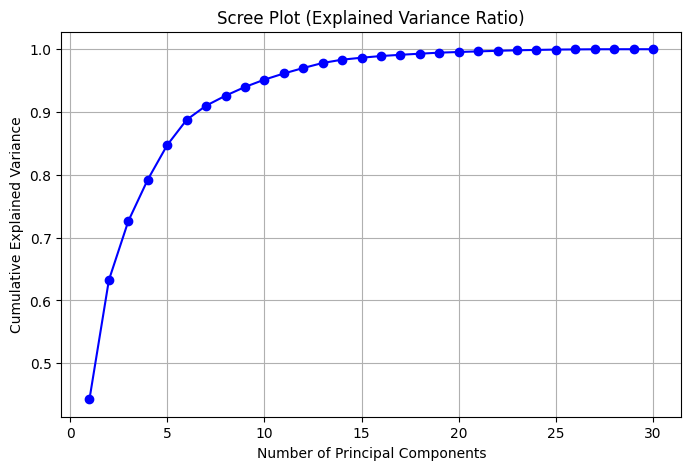

In [26]:
# Apply PCA without specifying components to see all variances
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', color='b')
plt.title('Scree Plot (Explained Variance Ratio)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [27]:
# Retain 95% of the variance
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)

print("Original feature count:", X_scaled.shape[1])
print("Reduced feature count after PCA (95% variance):", X_pca.shape[1])


Original feature count: 30
Reduced feature count after PCA (95% variance): 10


In [28]:
# Split for both original and PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)


In [29]:
# Training and Evaluate KNN on original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)

print(" KNN on Original Data")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
print("\nClassification Report:\n", classification_report(y_test, y_pred_orig))


 KNN on Original Data
Accuracy: 0.9707602339181286

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [30]:
# Train and Evaluate KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

print("KNN on PCA-Transformed Data")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))


KNN on PCA-Transformed Data
Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



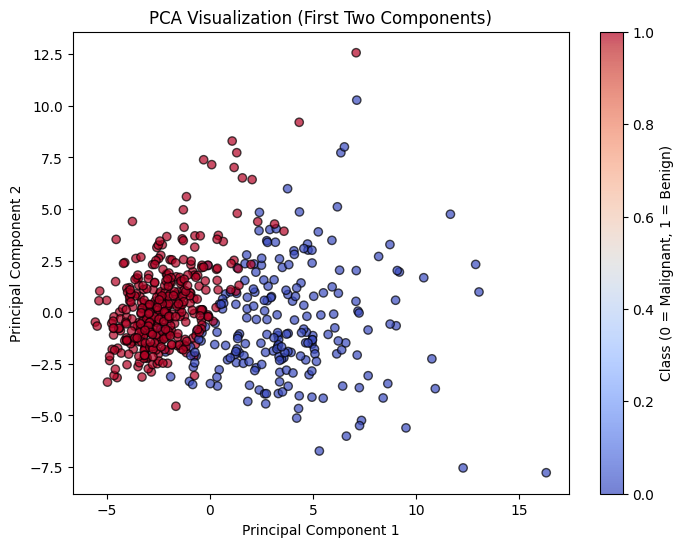

In [31]:
# PCA with 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('PCA Visualization (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()


In [32]:
# Question 9:KNN Regressor with Distance Metrics and K-Value
# Analysis
# Task:
# 1. Generate a synthetic regression dataset
# (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
# 2. Train a KNN regressor with:
# a. Euclidean distance (K=5)
# b. Manhattan distance (K=5)
# c. Compare Mean Squared Error (MSE) for both.
# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split data into training and testing sets (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for distance-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# KNN with Euclidean distance (p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
print(f"MSE (Euclidean, K=5): {mse_euclidean:.2f}")


MSE (Euclidean, K=5): 4837.04


In [35]:
# KNN with Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
print(f"MSE (Manhattan, K=5): {mse_manhattan:.2f}")


MSE (Manhattan, K=5): 5428.59


In [36]:
print("Comparison of Distance Metrics:")
print(f"Euclidean Distance MSE : {mse_euclidean:.2f}")
print(f"Manhattan Distance MSE : {mse_manhattan:.2f}")

if mse_euclidean < mse_manhattan:
    print("Euclidean distance performed slightly better for this dataset.")
else:
    print("Manhattan distance performed slightly better for this dataset.")


Comparison of Distance Metrics:
Euclidean Distance MSE : 4837.04
Manhattan Distance MSE : 5428.59
Euclidean distance performed slightly better for this dataset.


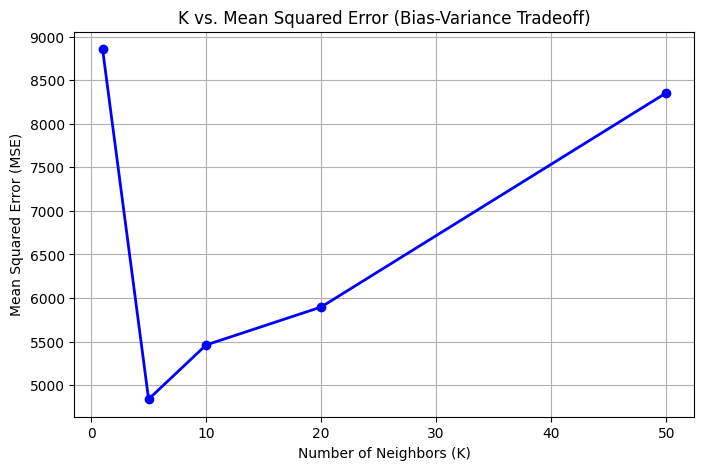

In [37]:
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, p=2)  # Using Euclidean distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs. MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o', color='b', linewidth=2)
plt.title('K vs. Mean Squared Error (Bias-Variance Tradeoff)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


Interpretation — Bias-Variance Tradeoff

Low K (K=1):

Model has low bias but high variance.

Overfits the data and captures noise.

High K (K=50):

Model has high bias but low variance.

Smooth predictions, may underfit.

Optimal K:
Lies somewhere in the middle (e.g., K=5 or K=10), balancing bias and variance for lowest MSE.

In [38]:
# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
# Data
# Task:
# 1. Load the Pima Indians Diabetes dataset (contains missing values).
# 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
# 3. Train KNN using:
# a. Brute-force method
# b. KD-Tree
# c. Ball Tree
# 4. Compare their training time and accuracy.
# 5. Plot the decision boundary for the best-performing method (use 2 most important
# features).

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
# Load dataset from sklearn or via URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Define column names
cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
        "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(url, names=cols)

print("🔹 Dataset Shape:", df.shape)
df.head()


🔹 Dataset Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
# Replace zeros with NaN (except 'Pregnancies' and 'Outcome')
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Count missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [41]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Missing values handled using KNN Imputation.")
df_imputed.head()


Missing values handled using KNN Imputation.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [42]:
X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize data (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [43]:
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end = time.time()

    acc = accuracy_score(y_test, y_pred)
    results[algo] = {"accuracy": acc, "time": end - start}

    print(f"Algorithm: {algo}")
    print(f" Accuracy: {acc:.4f}")
    print(f"Training Time: {end - start:.4f} sec\n")


Algorithm: brute
 Accuracy: 0.7446
Training Time: 0.0067 sec

Algorithm: kd_tree
 Accuracy: 0.7446
Training Time: 0.0080 sec

Algorithm: ball_tree
 Accuracy: 0.7446
Training Time: 0.0070 sec



           accuracy      time
brute      0.744589  0.006706
kd_tree    0.744589  0.007987
ball_tree  0.744589  0.007023


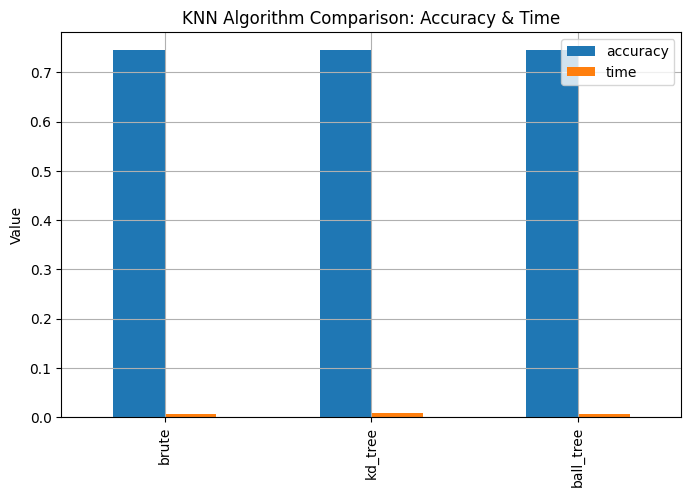

In [44]:
results_df = pd.DataFrame(results).T
print(results_df)

# Visualization
results_df.plot(kind='bar', figsize=(8,5))
plt.title("KNN Algorithm Comparison: Accuracy & Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [45]:
best_algo = results_df['accuracy'].idxmax()
print(f"Best Performing Algorithm: {best_algo}")


Best Performing Algorithm: brute
